## ***Лабораторная работа №3***
# "Кдассификация текстовых данных"
# <i>Выполнил: Антипов Д.А. А-01-19</i>

## **Цель работы:**

получить практические навыки решения задачи классификации текстовых данных. Научиться проводить предварительную обработку текстовых данных, настраивать параметры методов классификации и обучать модели, оценивать точность полученных моделей.

## **Выполнение**

1. Загрузить выборку из лабораторной работы №2. Стемминг проводить не нужно.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import gensim.downloader

In [ ]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'rec.autos']
remove = ('headers', 'footers', 'quotes')
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, categories = categories, remove = remove )
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, categories = categories, remove = remove )
twenty_dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, categories = categories, remove = remove )

2. Используя GridSearchCV произвести предварительную обработку данных и настройку методов классификации в соответствие с заданием, вывести оптимальные значения параметров и результаты классификации модели (полнота, точность, f1-мера и аккуратности) с данными параметрами.

Метод K-ближайших соседей(KNN):

* Количество ближайших соседей
* Метрика(евлкидова, косинусная)

In [ ]:
parameters = {'vect__max_features': (500,1000,5000,10000,20000,40000),
              'vect__stop_words': ('english', None),
              'tfidf__use_idf': (True, False),
              'clf__n_neighbors': (3,5,7,9,12),
              'clf__metric': ('euclidean', 'cosine')}

text_clf = Pipeline([('vect', CountVectorizer(max_features= 1000, stop_words = 'english')),
                    ('tfidf', TfidfTransformer(use_idf = True)),
                    ('clf', KNeighborsClassifier (n_neighbors=1)),])

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, cv=3)
gs_clf.fit(twenty_train.data, twenty_train.target)
print(gs_clf.best_params_)

{'clf__metric': 'cosine', 'clf__n_neighbors': 9, 'tfidf__use_idf': True, 'vect__max_features': 10000, 'vect__stop_words': 'english'}


In [ ]:
predict = gs_clf.predict(twenty_test.data)
print(classification_report(twenty_test.target, predict))
print('Accuracy: ', accuracy_score(twenty_test.target, predict))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       389
           1       0.82      0.78      0.80       394
           2       0.86      0.93      0.89       396

    accuracy                           0.83      1179
   macro avg       0.83      0.83      0.83      1179
weighted avg       0.83      0.83      0.83      1179

Accuracy:  0.8278201865988125


Метод опорных векторов (SVM):
* функция потерь (параметр kernel: ‘linear’, ‘rbf’)
* регуляризация (параметр C: {0.1, 1, 5}) Обратить внимание, что разные виды регуляризации работают с разными функциями потерь

In [ ]:
parameters_1 = {'vect__max_features': (500,1000,5000,10000,20000,40000),
              'vect__stop_words': ('english', None),
              'tfidf__use_idf': (True, False),
              'clf__kernel': ('linear', 'rbf'),
              'clf__C': (0.1, 1, 5)}

text_clf_1 = Pipeline([('vect', CountVectorizer(max_features= 1000, stop_words = 'english')),
                    ('tfidf', TfidfTransformer(use_idf = True)),
                    ('clf', SVC ()),])
gs_clf_1 = GridSearchCV(text_clf_1, parameters_1, n_jobs=-1, cv=3)
gs_clf_1.fit(twenty_train.data, twenty_train.target)
print(gs_clf_1.best_params_)

{'clf__C': 5, 'clf__kernel': 'rbf', 'tfidf__use_idf': True, 'vect__max_features': 40000, 'vect__stop_words': 'english'}


In [ ]:
#print(gs_clf.cv_results_)
predict_1 = gs_clf_1.predict(twenty_test.data)
print(classification_report(twenty_test.target, predict_1))
print('Accuracy: ', accuracy_score(twenty_test.target, predict_1))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       389
           1       0.92      0.73      0.81       394
           2       0.85      0.98      0.91       396

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179

Accuracy:  0.8592027141645462


**Вывод:**

исходя из показателей качества, лучше показал себя метод опорных векторо (SVM) со следующими параметрами: 'clf__C': 5, 'clf__kernel': 'rbf', 'tfidf__use_idf': True, 'vect__max_features': 40000, 'vect__stop_words': 'english'

3. Перевести выборку к вектороному представлению word embedding согласно варианту (glove-wiki-gigaword-100)

In [ ]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
glove_model = gensim.downloader.load("glove-wiki-gigaword-100")

In [ ]:
def text2vec(text_data):

  vectorizer = CountVectorizer(stop_words='english')
  # Векторизуем с помощью обученного CountVectorizer
  X = vectorizer.fit_transform(text_data)
  CV_text_data=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

  # Создадим датафрейм, в который будем сохранять вектор документа
  glove_data=pd.DataFrame()
  words_vocab=CV_text_data.columns

  # Пробегаем по каждой строке (по каждому документу)
  for i in range(CV_text_data.shape[0]):

    # Вектор одного документа с размерностью glove-модели:
    one_doc = np.zeros(100)

    # Пробегаемся по каждому документу, смотрим, какие слова документа присутствуют в нашем словаре
    # Суммируем glove-вектора каждого известного слова в one_doc
    for word in words_vocab[CV_text_data.iloc[i,:] >= 1]:
      if word in glove_model.key_to_index.keys():
        one_doc += glove_model[word]

    glove_data = pd.concat([glove_data, pd.DataFrame([one_doc])], axis = 0)
  return glove_data

In [ ]:
train_data_glove = text2vec(twenty_train.data)
test_data_glove = text2vec(twenty_test.data)

4. Провести обучение и настройку тех же алгоритмов классификации и с теме же параметрами, что и в п., но на векторизованной выборке.

Метод K-ближайших соседей (KNN)

In [ ]:
parameters_2 = {'clf__n_neighbors': (3,5,7,9,12),
                'clf__metric': ('euclidean', 'cosine')}

text_clf_2 = Pipeline([('clf', KNeighborsClassifier (n_neighbors=1)),])

gs_clf_2 = GridSearchCV(text_clf_2, parameters_2, n_jobs=-1, cv=3)
gs_clf_2.fit(train_data_glove, twenty_train.target)
print(gs_clf_2.best_params_)

{'clf__metric': 'cosine', 'clf__n_neighbors': 12}


In [ ]:
predict_2 = gs_clf_2.predict(test_data_glove)
print(classification_report(twenty_test.target, predict_2))
print('Accuracy: ', accuracy_score(twenty_test.target, predict_2))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       389
           1       0.73      0.66      0.69       394
           2       0.87      0.92      0.89       396

    accuracy                           0.77      1179
   macro avg       0.77      0.77      0.77      1179
weighted avg       0.77      0.77      0.77      1179

Accuracy:  0.7709923664122137


Метод опорных векторов (SVM)

In [ ]:
parameters_3 = {'clf__kernel': ('linear', 'rbf'),
                'clf__C': (0.1, 1, 5)}

text_clf_3 = Pipeline([('clf', SVC()),])

gs_clf_3 = GridSearchCV(text_clf_3, parameters_3, n_jobs=-1, cv=3)
gs_clf_3.fit(train_data_glove, twenty_train.target)
print(gs_clf_3.best_params_)

{'clf__C': 5, 'clf__kernel': 'rbf'}


In [ ]:
predict_3 = gs_clf_3.predict(test_data_glove)
print(classification_report(twenty_test.target, predict_3))
print('Accuracy: ', accuracy_score(twenty_test.target, predict_3))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       389
           1       0.76      0.70      0.73       394
           2       0.81      0.96      0.88       396

    accuracy                           0.79      1179
   macro avg       0.79      0.79      0.79      1179
weighted avg       0.79      0.79      0.79      1179

Accuracy:  0.7930449533502969


Вывод:

по результатам работы метод опорных векторов показал лучшие результаты классификации по сравнению с методом K-ближайших соседей со следующими параметрами: 'clf__C': 5, 'clf__kernel': 'rbf'. Однако показатели качества при обучении и тестировании на векторизованной выборке оказались слегка ниже, нежели на невекторизованной.

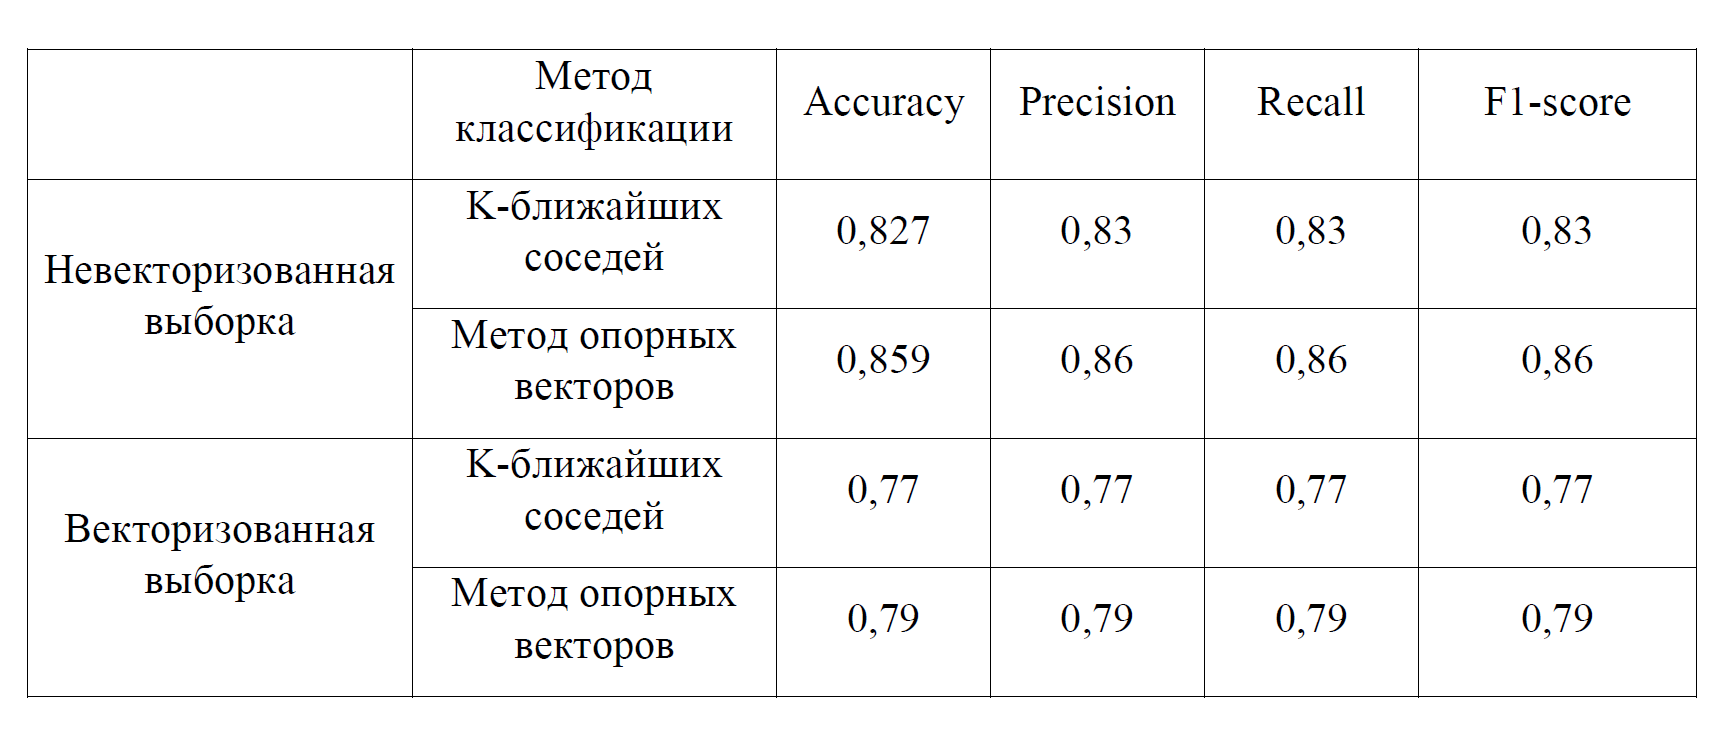